# MultiREx - Quickstart
#### Planetary transmission spectra generator
##### [GitHub Repository](https://github.com/D4san/MultiREx-public)
<a target="_blank" href="https://colab.research.google.com/github/D4san/MultiREx-public/blob/main/examples/multirex-quickstart.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## External dependencies

If you are working in Google Colab use this to install dependencies. 

In [38]:
import sys 
if 'google.colab' in sys.modules:
    !pip install -Uq multirex
    !mkdir resources/

> **NOTE**: After installing you should reset Colab session before importing the package. This is to avoid an unintended behavior of the package `pybtex`.

If you have already reset the Colab session, let's import `MultiREx` and any other package required for this example:

In [1]:
import multirex as mrex
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# This is for developing purposes
%load_ext autoreload 
%autoreload 2

Loading MultiREx version 0.1.5


## Creating a single system

### Components

The central concept in `MultiREx` is that of a system. A system is made of a star, a planet and its atmosphere. Each component may have a wide range of properties useful for the purposes of the package. However, the key properties required for calculating a basic transmission spectra are defined below:

- **Star**:
  - Effective temperature in Kelvins (attribute `temperature`).
  - Radius in solar radii (attribute `radius`).
  - Mass in solar masses (attribute `mass`).

- **Planet**:
  - Radius in Earth radii (attribute `radius`).
  - Mass in Earth masses (attribute `mass`).

- **Atmosphere**: 
  - Surface temperature in Kelvins (attribute `temperature`).
  - Surface pressure in Pascals (attribute `base_pressure`).
  - Pressure at the top of the atmosphere in Pascals (attribute `top_pressure`).
  - Composition (attribute `composition`). This is provided as a dictionary whose keys are the name of the gasses (e.g. 'CO2', 'CH4') and the value are the $log_{10}$ of the mixing ratio of the corresponding gas.  
  - Fill gass name (attribute `fill_gass`), i.e. the gass which fills the atmopshere (usually 'N2' for atmospheres of inhabited planets).

### Available gasses

If you want to see the list of available gasses in the package use:

In [3]:
mrex.Util.list_gases()

Available gases in the database:
['O2', 'CH4', 'CO2', 'H2O', 'O3']


`MultiREx` comes along with [ExoTransmit](https://github.com/elizakempton/Exo_Transmit/tree/master/Opac) opacities for these particular gasses. These opacities are low resolution and light-weighted. They should be used only for testing purposes. For larger scientific applications, `MultiREx` provides a larger database of high-resolution opacities (most of them from [ExoMol](https://www.exomol.com/data/search/)) for a larger number of gasses. This database is hosted in a Google Drive repository and can be obtained and loaded into the running instance of `MultiREx` using:

> **WARNING**: Be careful with this command: it will use as much as 4 GB of disk space.

In [4]:
mrex.Util.get_gases(path='tmp/')

The path where the opacity database will be downloaded is:  tmp/


Downloading...
From (original): https://drive.google.com/uc?id=1z7R0hD1IBuYo-nnl7dpE_Ls2337a0uv6
From (redirected): https://drive.google.com/uc?id=1z7R0hD1IBuYo-nnl7dpE_Ls2337a0uv6&confirm=t&uuid=8e75c085-73d3-47bf-bf6f-1bc48f437a6e
To: c:\Proyectos\Astro\MultiREx-public\examples\tmp\opacidades-todas.zip
100%|██████████| 2.12G/2.12G [01:19<00:00, 26.8MB/s]


Once downloaded, the list of available gasses are considerably larger:_

In [5]:
mrex.Util.list_gases()

Available gases in the database:
['O2', 'HCN', 'N2', 'CH4', 'DMS', 'CO2', 'NH3', 'C2H6', 'NO2', 'H2O', 'CO', 'SO2', 'O3', 'CH3Cl']


### Creating components of the system

Let's create a star:

In [6]:
star = mrex.Star(temperature=5777,radius=1,mass=1)

You may get the attributes of the star using:

In [7]:
star.mass, star.temperature

(1, 5777)

You may also modify the mass of the star:

In [8]:
star.set_mass(1.5)

Now create the planet:

In [9]:
planet = mrex.Planet(radius=1,mass=1)

And finally create the atmosphere:

In [10]:
atmosphere = mrex.Atmosphere(
    temperature=288, # in K
    base_pressure=1e5, # in Pa
    top_pressure=1, # in Pa
    fill_gas='N2', # the gas that fills the atmosphere
    composition=dict(
        CO2=-4, # This is the log10(mix-ratio)
        CH4=-6,
    )
)

Once created we can integrate the three components in a system:

In [11]:
planet.set_atmosphere(atmosphere)
system = mrex.System(star=star,planet=planet,sma=1)

After ensembling the components you still have access to the properties independently:

In [12]:
system.planet.radius

1

We can ensemble a system using a single command like:

In [13]:
system = mrex.System(
    star=mrex.Star(
        temperature=5777,
        radius=1,
        mass=1
    ),
    planet=mrex.Planet(
        radius=1,
        mass=1,
        atmosphere=mrex.Atmosphere(
            temperature=290, # in K
            base_pressure=1e5, # in Pa
            top_pressure=1, # in Pa
            fill_gas='N2', # the gas that fills the atmosphere
            composition=dict(
                CO2=-4, # This is the log10(mix-ratio)
                CH4=-6,
            )
        )
    ),
    sma=1
)

### The transmission model

Once we have a system we can create the transmission model:

In [14]:
system.make_tm()

The transmission model is a `Taurex` class that allows us to create transmission spectra as desired. It encapsulates all the attributes and methods used to described the atmosphere that are taken into account when calculating the transmission spectra. `MultiREx` essentially simplify the interaction with the wide range of options of `TauREx` for specifying those attributes.  

You may take a quick look to the attributes of the transmission model using:

In [15]:
system.transmission.__dict__

{'_logger': <Logger taurex.TransmissionModel (CRITICAL)>,
 '_param_dict': {},
 '_derived_dict': {},
 'opacity_dict': {},
 'cia_dict': {},
 '_native_grid': None,
 '_derived_parameters': {'logg': ('logg',
   'log(g)',
   <bound method BasePlanet.logg of <taurex.data.planet.Planet object at 0x000002779CE05850>>,
   False),
  'avg_T': ('avg_T',
   '$\\bar{T}$',
   <bound method TemperatureProfile.averageTemperature of <taurex.data.profiles.temperature.isothermal.Isothermal object at 0x000002779CE06060>>,
   False),
  'metallicity': ('metallicity',
   'Z',
   <bound method TaurexChemistry.metallicity of <taurex.data.profiles.chemistry.taurexchemistry.TaurexChemistry object at 0x000002779C9F62A0>>,
   False),
  'mu': ('mu',
   '$\\mu$',
   <bound method Chemistry.mu of <taurex.data.profiles.chemistry.taurexchemistry.TaurexChemistry object at 0x000002779C9F62A0>>,
   True)},
 '_fitting_parameters': {'planet_mass': ('planet_mass',
   '$M_p$',
   <bound method BasePlanet.mass of <taurex.data.pl

### Generating a transmission spectrum

In order to create and manipulate a transmission spectrum, we need first to genereta a wave number grid:

In [16]:
wns = mrex.Physics.wavenumber_grid(wl_min=0.6,wl_max=10,resolution=1000)

The corresponding wavelength grid is:

In [17]:
wls = np.sort(1e4/wns)
wls[:10],wls[-10:]

(array([0.6       , 0.60169212, 0.60338901, 0.60509068, 0.60679716,
        0.60850844, 0.61022456, 0.61194551, 0.61367132, 0.61540199]),
 array([ 9.74972472,  9.77722085,  9.80479454,  9.83244598,  9.86017541,
         9.88798304,  9.91586909,  9.94383379,  9.97187735, 10.        ]))

Let's generate the transmission spectrum:

In [18]:
wns,spectrum = system.generate_spectrum(wns)
wls = 1e4/wns

The spectrum is an adimensional quantity given in terms of the fraction of the stellar area blocked by the planet and its atmosphere, in other words $(R_p/R_\star)^2$. It is conventionally measured in parts per million (ppm) and conventionally called *transit depth*. In our case, if the planet was air-less it will produce a spectrum with a depth of:

In [19]:
from astropy.constants import R_sun, R_earth
1e6*(system.planet.radius*R_earth/(system.star.radius*R_sun))**2

<Quantity 84.05017877>

Once the spectrum has been calculated we can plot it:

Text(0, 0.5, 'Transit depth [ppm]')

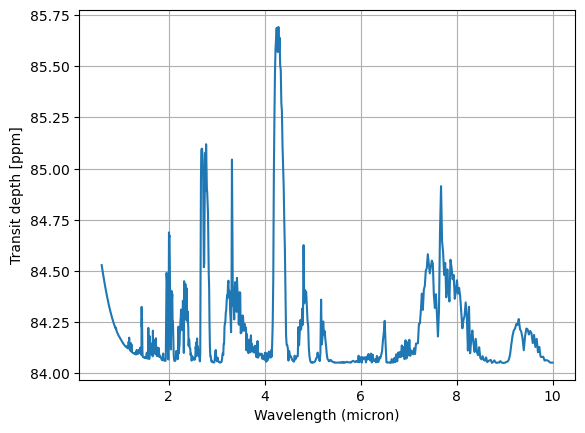

In [20]:
plt.plot(wls,spectrum*1e6)
plt.grid()
plt.xlabel('Wavelength (micron)')
plt.ylabel('Transit depth [ppm]')

You can also plot the spectrum using the *absortion height*, namely the apparent size of the atmosphere as seen at a given wavelength and which is given by:

$$
h = R_\star \left(\sqrt{S}  - \frac{R_p}{R_\star}\right)
$$

In [21]:
effalts = (np.sqrt(spectrum)*system.star.radius*R_sun.value - system.planet.radius*R_earth.value)/1e3
effalts[:10]

array([0.07626681, 0.06778101, 0.11127472, 0.37537931, 0.50011134,
       0.52420784, 0.45433174, 1.1838071 , 1.08375566, 1.17605428])

This is precisely the function of the routine `mrex.Physics.spectrum2height`:

In [22]:
effalts = mrex.Physics.spectrum2altitude(spectrum,system.planet.radius,system.star.radius)

Let's plot it:

Text(0, 0.5, 'Absortion height [km]')

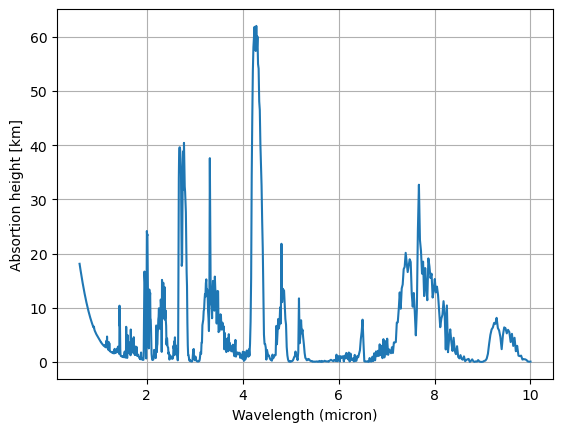

In [23]:
plt.plot(wls,effalts)
plt.grid()
plt.xlabel('Wavelength (micron)')
plt.ylabel('Absortion height [km]')

We have automated the spectrum plotting using the routine:

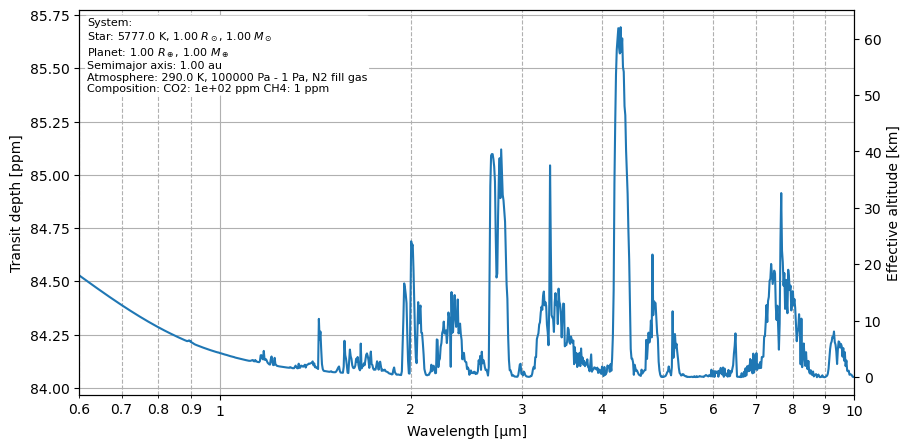

In [24]:
fig, ax = system.plot_spectrum(wns,xscale='log')

### Studying spectral contributions

In order to understand a given spectrum you can also calculate all the individual contributions:

In [25]:
wns, contributions = system.generate_contributions(wns)

Contributions are also calculated as transit depths. Contributions are given as a dictionary with two keys: *Absorption* and *Rayleigh* scattering. 

Text(0, 0.5, 'Transit depth [ppm]')

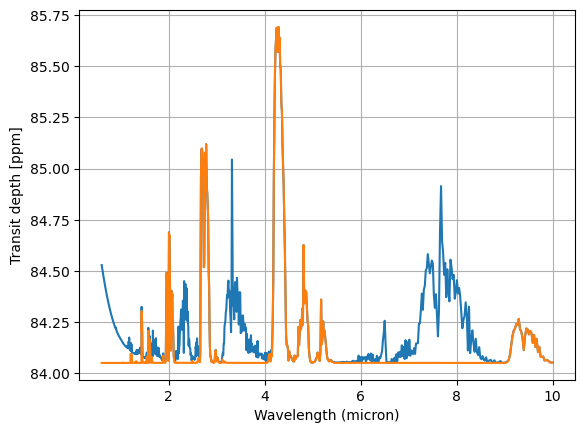

In [26]:
plt.plot(wls,spectrum*1e6)
plt.plot(wls,contributions['Absorption']['CO2']*1e6)
plt.grid()
plt.xlabel('Wavelength (micron)')
plt.ylabel('Transit depth [ppm]')

We have devised a special method to plot all contributions at once:

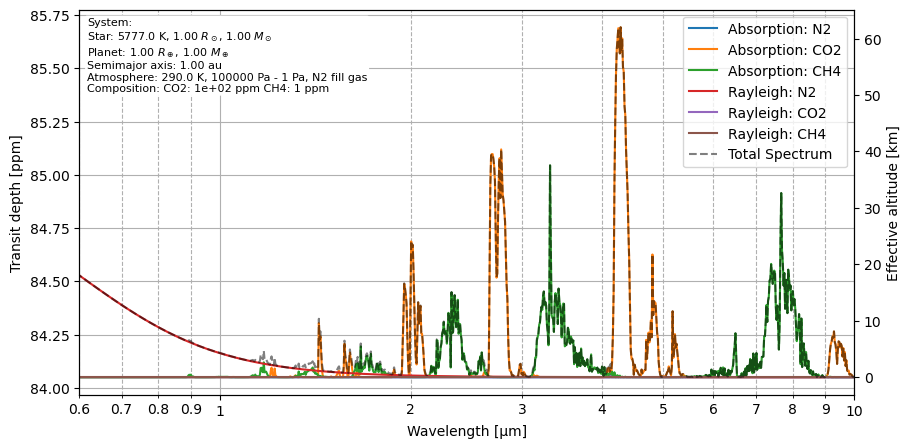

In [27]:
fig, ax = system.plot_contributions(wns,xscale='log')

Let's save this beautiful figure: 

In [28]:
fig.savefig('resources/contributions-transmission-spectrum.png')

### Observations

Once you have a theoretical transmission spectrum you may generate an observed spectrum. In the present version of `MultiREx` we use a very simplified model for error which is independent of wavelength and signal strength (transit depth). It simply adds a gaussian error to a spectra according to a constant noise which depends on a provided value of the signal-to-noise ratio (SNR).

In [29]:
observation = system.generate_observations(wns, snr=10)
observation

,noise,SNR,10.0,9.971877,9.943834,9.915869,9.887983,9.860175,9.832446,9.804795,...,0.615402,0.613671,0.611946,0.610225,0.608508,0.606797,0.605091,0.603389,0.601692,0.6
0,1.641670e-07,10,0.000084,0.000084,0.000084,0.000084,0.000084,0.000084,0.000084,0.000084,...,0.000085,0.000084,0.000085,0.000085,0.000084,0.000084,0.000084,0.000085,0.000084,0.000085


Observations are returned as a `pandas` dataframe which is more convenient for manipulation of large sets of spectra. You may obtain wavelengths and transit depths from a dataframe using:

In [30]:
noise, wls, spectra = mrex.Physics.df2spectra(observation)

Now you may plot the resulting observed spectrum:

Text(0, 0.5, 'Transit depth [ppm]')

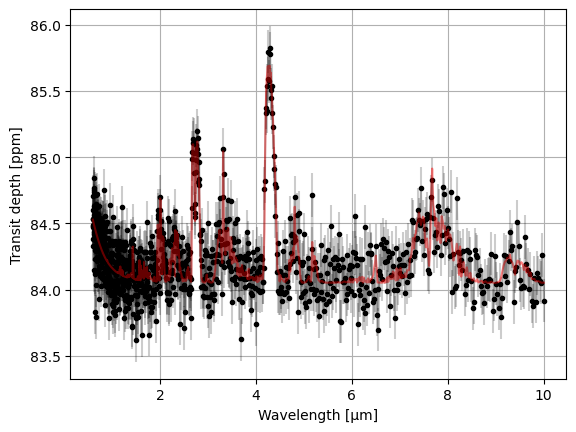

In [31]:
plt.plot(wls,spectra[0]*1e6,'k.')
plt.errorbar(wls,spectra[0]*1e6,yerr=noise[0]*1e6,color='k',alpha=0.2)
plt.plot(wls,spectrum*1e6,color='r',alpha=0.5)
plt.grid()
plt.xlabel('Wavelength [μm]')
plt.ylabel('Transit depth [ppm]')

### Random systems

The superpower of MultiREx is its ability to generate random realizations of a system of star, planet and atmosphere. 

Let's assume for instance that all key parameters of the system components (stellar radius, planetary mass, atmospheric surface pressure, etc.) are physically and statistically independent. If we instantiate a system setting those parameters with a tuple `(min,max)` the properties of the system will be choosen as a uniformly-deviated random value in the interval `[min,max]`. See for instance:

In [32]:
system=mrex.System(
    star=mrex.Star(
        temperature=(4000,6000),
        radius=(0.5,1.5),
        mass=(0.8,1.2),
    ),
    planet=mrex.Planet(
        radius=(0.5,1.5),
        mass=(0.8,1.2),
        atmosphere=mrex.Atmosphere(
            temperature=(290,310), # in K
            base_pressure=(1e5,10e5), # in Pa
            top_pressure=(1,10), # in Pa
            fill_gas="N2", # the gas that fills the atmosphere
            composition=dict(
                CO2=(-5,-4), # This is the log10(mix-ratio)
                CH4=(-6,-5),
            )
        )
    ),
    sma=(0.5,1)
)

We can check the value of the key properties:

In [33]:
print(system.star.mass, 
      system.planet.atmosphere.temperature, 
      system.planet.atmosphere.base_pressure,
      system.planet.atmosphere.composition,
      system.sma)

1.0813396704519789 296.91447108065734 222993.97977895784 {'CO2': -4.081101501633349, 'CH4': -5.373950708119493} 0.6728617770164333


You may notice that the values are completely random. If you reshuffle the system:

In [34]:
system.reshuffle()

The values of the key parameters are entirely different:

In [35]:
print(system.star.mass, 
      system.planet.atmosphere.temperature, 
      system.planet.atmosphere.base_pressure,
      system.planet.atmosphere.composition,
      system.sma)

0.8694089965710639 299.6098527080676 306935.0265556476 {'CO2': -4.881813305577949, 'CH4': -5.7317610690871055} 0.673212447345882


Having a realization of the system with different parameters is like living in a multiverse where everything is the same except for the particular value of the parameters of this system.

### Synthesizing spectra in the multiverse

Our last step is to generate a full set of synthetic theoretical and observed spectra for single realizations of the set of key parameters. 

In [36]:
system.make_tm()
wns = mrex.Physics.wavenumber_grid(wl_min=0.6,wl_max=10,resolution=300)

n_universes = 100
n_observations = 10
data = system.explore_multiverse(wns,snr=10,
                                 n_universes=n_universes,
                                 n_observations=n_observations,
                                 path='tmp/')

spectra, observations = data.values()

c:\Users\User\anaconda3\Lib\site-packages\taurex\data\profiles\pressure\pressureprofile.py:137: DeprecationWarning: SimplePressureProfile is deprecated. Use LogPressureProfile instead
  warn(
c:\Users\User\anaconda3\Lib\site-packages\taurex\model\transmission.py:80: DeprecationWarning: SimpleForwardModel is deprecated. Use OneDForwardModel instead
  super().__init__(
Exploring universes:   0%|          | 0/100 [00:00<?, ?it/s]c:\Users\User\anaconda3\Lib\site-packages\taurex\data\planet.py:136: DeprecationWarning: fullRadius is deprecated, use get_planet_radius(unit='m') instead
  warn(
Exploring universes:   1%|          | 1/100 [00:00<01:06,  1.50it/s]c:\Users\User\anaconda3\Lib\site-packages\taurex\data\profiles\pressure\pressureprofile.py:137: DeprecationWarning: SimplePressureProfile is deprecated. Use LogPressureProfile instead
  warn(
c:\Users\User\anaconda3\Lib\site-packages\taurex\model\transmission.py:80: DeprecationWarning: SimpleForwardModel is deprecated. Use OneDForwardMod

Generating observations for 100 spectra...



C:\Proyectos\Astro\MultiREx-public\multirex\spectra.py:1558: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  final_spectra_df = pd.concat([all_header_df, all_spectra_df], axis=1)


Let's analyse the output of this code:

- `data`: A dictionary containing both, spectra and observations.

- `spectra`: A dataframe containing the theoretical spectra corresponding to each realization of the system key parameters. The number of rows of this dataframe is equal to the `n_universes` parameter. 

- `observations`: A dataframe cointaining the observed spectra made `n_observations` times in each parallel universe. The number of rows of this dataframe is equal to `n_universes*n_observations`. 

If you want to compare 3 observed spectra, made at the universe number `n` we use:

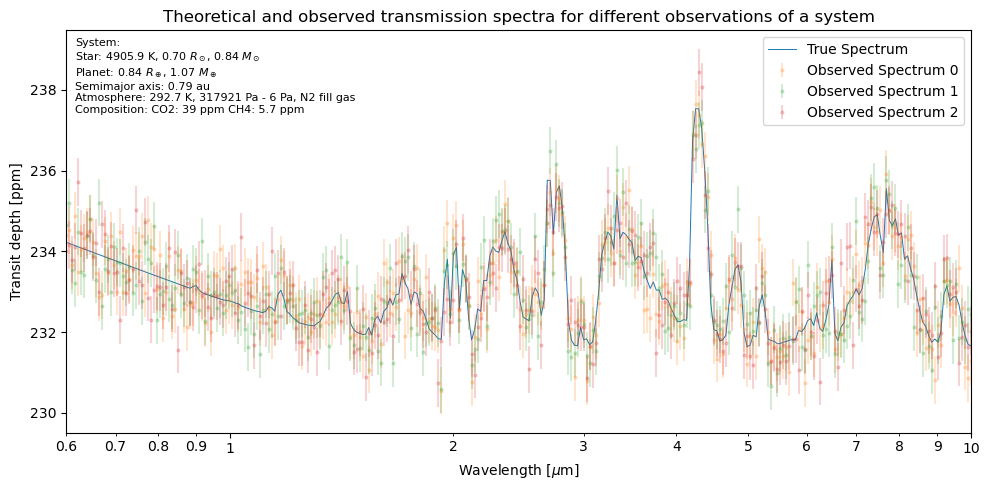

In [37]:
n = 5
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(1e4/wns,spectra.data.iloc[n]*1e6,label="True Spectrum",linewidth=0.7)
for i in range(3):
    ax.errorbar(x=1e4/wns,
                 y=observations.data.iloc[n*n_observations+i]*1e6,
                 yerr=observations.params["noise"][n*n_observations+i]*1e6,
                label=f"Observed Spectrum {i}",fmt="o",markersize=2,alpha=0.2)
    
ax.set_xscale("log")
ax.set_xlabel(r"Wavelength [$\mu$m]")
ax.set_ylabel(r"Transit depth [ppm]")
ax.set_title("Theoretical and observed transmission spectra for different observations of a system")
ax.legend()
ax.margins(x=0)

from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y))
ax.xaxis.set_major_formatter(formatter)
formatter = FuncFormatter(lambda y, _: '{:.1g}'.format(y))
ax.xaxis.set_minor_formatter(formatter)

text = ax.text(0.01,0.98,system.__str__(),fontsize=8,verticalalignment='top',transform=ax.transAxes)
text.set_bbox(dict(facecolor='w',alpha=1,edgecolor='w',boxstyle='round,pad=0.1'))

fig.tight_layout()
fig.savefig("resources/synthetic-transmission-spectra.png")

Since in the last command you provided a value for the `path` variable, a `parquet` version of the dataframes are stored on disk in the `path` directory. 

> **WARNING**: Be careful when using this options since this files can become extremely large depending on the number of universes and the number of observations per universe. 

<hr/>

For more examples and real use-cases of `MultiREx` see the [GitHub repository](https://github.com/D4san/MultiREx-public/tree/main/examples)